No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


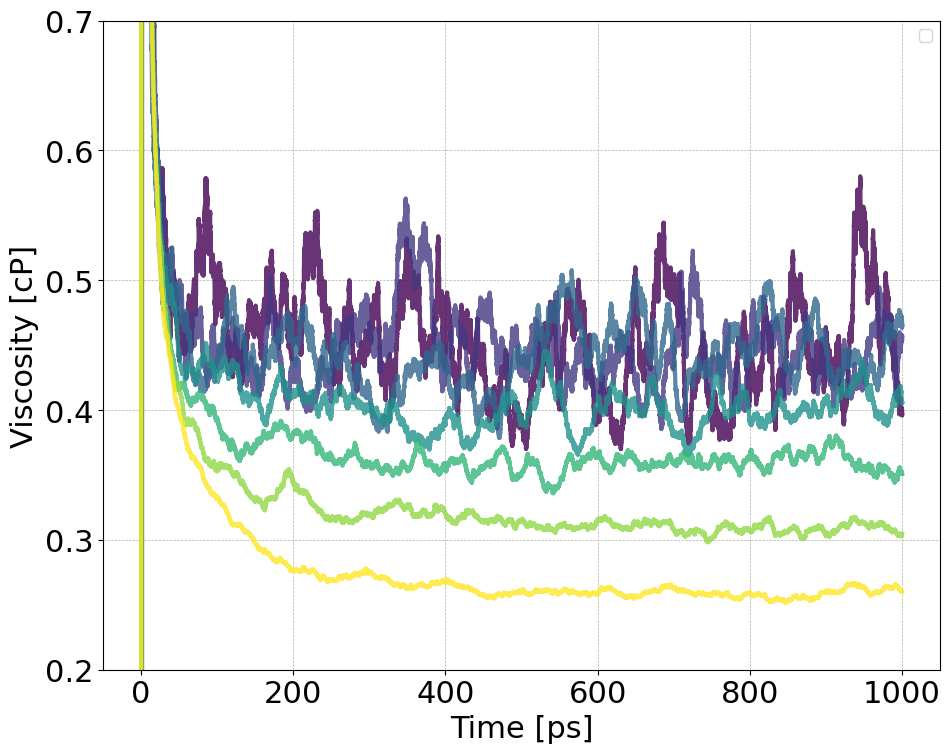

In [10]:
#Plot all curves @ different A values
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import glob
import re

# Function to read .xvg file and extract data
def read_xvg(filename):
    time = []
    inv_viscosity = []
    with open(filename, 'r') as file:
        for line in file:
            if not line.startswith(('#', '@')):
                parts = line.split()
                time.append(float(parts[0]))  # Assuming the first column is simulation time
                inv_viscosity.append(float(parts[1]))  # Assuming the second column is 1/viscosity
    return np.array(time), np.array(inv_viscosity)

# Function to calculate viscosity from 1/viscosity
def calculate_viscosity(inv_viscosity):
    viscosity = 1000 / inv_viscosity  # Calculate viscosity from 1/viscosity
    return viscosity

# Directory containing the .xvg files
directory = './Previous_run/'  # Update the folder containing molecule's viscosity here

# List all .xvg files in the directory
xvg_files = glob.glob(directory + '*.xvg')

# Dictionary to store data
data_dict = {}

# Process each .xvg file
for filename in xvg_files:
    match = re.search(r'(\d+)_(\d+\.\d+)\.xvg$', filename)
    if match:
        temperature = int(match.group(1))
        A_value = float(match.group(2))
        
        # Read the data from the .xvg file
        time_data, inv_viscosity_data = read_xvg(filename)

        # Calculate the viscosity
        viscosity = calculate_viscosity(inv_viscosity_data)
        
        # Store the data in the dictionary
        if A_value not in data_dict:
            data_dict[A_value] = []
        data_dict[A_value].append((time_data, viscosity))

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 22})

# Colors for different A values
colors = plt.cm.viridis(np.linspace(0, 1, len(data_dict)))

# Plot each A value
#for color, (A_value, datasets) in zip(colors, data_dict.items()):
#    for time_data, viscosity in datasets:
#        ax.plot(time_data, viscosity, label=f'A = {A_value}', color=color, alpha=0.7)
        
for color, (A_value, datasets) in zip(colors, data_dict.items()):
    for time_data, viscosity in datasets:
        ax.plot(time_data, viscosity, color=color, alpha=0.8, linewidth=3)

# Add labels and title
ax.set_xlabel('Time [ps]', fontsize=22)
ax.set_ylabel('Viscosity [cP]', fontsize=22)
#ax.set_title('Viscosity vs. Time for Different A Values', fontsize=22)

# Add gridlines
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a legend with increased font size and horizontal alignment
legend = ax.legend(fontsize=12, handletextpad=1)
for text in legend.get_texts():
    text.set_horizontalalignment('left')

# Improve tick parameters
ax.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(axis='both', which='minor', labelsize=22)

plt.ylim(0.2, 0.7)

# Tight layout for better spacing
plt.tight_layout()

# Save the figure as a high-resolution image
plt.savefig('A-values.png', dpi=300)

# Show the plot
plt.show()



C:\Users\danht\AppData\Local\Temp\ipykernel_29104\197888008.py:28: RuntimeWarning: invalid value encountered in power
  return eta_0 * (1 + (tau / tau_half)**(alpha - 1))**-1
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


For temperature 300:
Fitted parameters:
 eta_0 = 0.4544234854376632
 tau_half = 0.016990201611159727
 alpha = 3.5396860584478143


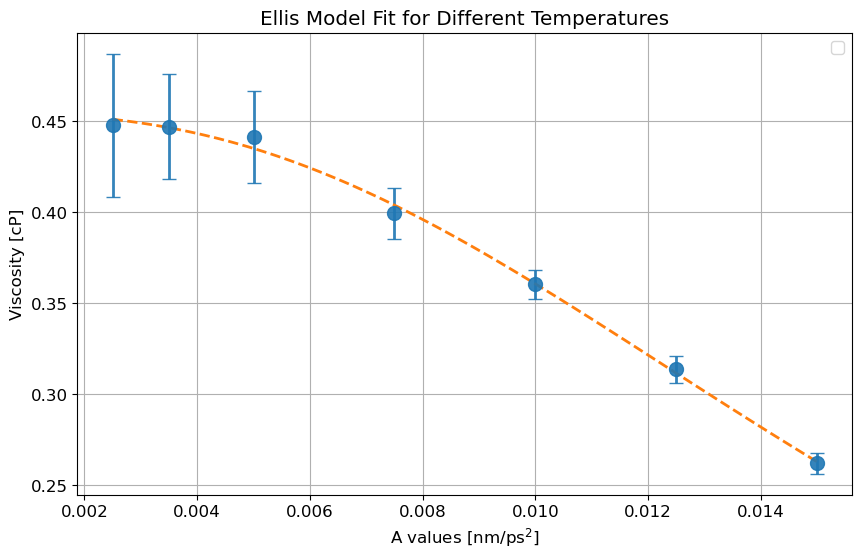

In [11]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import glob
import re

# Function to read .xvg file and extract data
def read_xvg(filename):
    time = []
    inv_viscosity = []
    with open(filename, 'r') as file:
        for line in file:
            if not line.startswith(('#', '@')):
                parts = line.split()
                time.append(float(parts[0]))  # Assuming the first column is simulation time
                inv_viscosity.append(float(parts[1]))  # Assuming the second column is 1/viscosity
    return np.array(time), np.array(inv_viscosity)

# Function to calculate average viscosity and standard deviation
def calculate_viscosity_stats(inv_viscosity):
    viscosity = 1000 / inv_viscosity  # Calculate viscosity from 1/viscosity
    avg_viscosity = np.mean(viscosity)  # Calculate the average viscosity
    std_dev_viscosity = np.std(viscosity)  # Calculate the standard deviation of viscosity
    return avg_viscosity, std_dev_viscosity

# Ellis model function
def ellis_model(tau, eta_0, tau_half, alpha):
    return eta_0 * (1 + (tau / tau_half)**(alpha - 1))**-1

# Directory containing the .xvg files
#directory = './90-Within/1/'  # Update the folder containing molecule's viccosity here
directory = './Previous_run/' 
#directory = ''
# List all .xvg files in the directory
xvg_files = glob.glob(directory + '*.xvg')

# Dictionary to hold A values and average viscosity values grouped by temperature
temperature_data = {}
eta_0_values = []

# Process each .xvg file
for filename in xvg_files:
    match = re.search(r'(\d+)_(\d+\.\d+)\.xvg$', filename)
    if match:
        temperature = int(match.group(1))
        A_value = float(match.group(2))
        
        # Read the data from the .xvg file
        time_data, inv_viscosity_data = read_xvg(filename)

        # Ignore the first 100 data points
        time_data = time_data[10000:]
        inv_viscosity_data = inv_viscosity_data[10000:]

        # Calculate the average viscosity
        average_viscosity, std_dev_viscosity = calculate_viscosity_stats(inv_viscosity_data)

        # Append the A value and corresponding average viscosity to the temperature_data dictionary
        if temperature in temperature_data:
            temperature_data[temperature]['A_value'].append(A_value)
            temperature_data[temperature]['average_viscosities'].append(average_viscosity)
            temperature_data[temperature]['std_viscosities'].append(std_dev_viscosity)
        else:
            temperature_data[temperature] = {
                'A_value': [A_value],
                'average_viscosities': [average_viscosity],
                'std_viscosities': [std_dev_viscosity]
            }

# Plot all fit curves for each temperature
plt.figure(figsize=(10, 6))
# Set global font size
plt.rcParams.update({'font.size': 12})

for temperature, data in temperature_data.items():
    shear_A_values = np.array(data['A_value'])
    average_viscosities = np.array(data['average_viscosities'])
    
    # Initial guess for the Ellis model parameters
    initial_guess = [1, 1, 1] # Cody, please change the values of them if the fitting does not converge
    
    # Fit the Ellis model to the data
    params, covariance = curve_fit(ellis_model, shear_A_values, average_viscosities, p0=initial_guess)
    
    # Extract fitted parameters
    eta_0_fit, tau_half_fit, alpha_fit = params
    eta_0_values.append((temperature, eta_0_fit))
    
    
    print(f"For temperature {temperature}:")
    print(f"Fitted parameters:\n eta_0 = {eta_0_fit}\n tau_half = {tau_half_fit}\n alpha = {alpha_fit}")
    
    # Plot the fit curve for this temperature
    shear_A_fit = np.linspace(min(shear_A_values), max(shear_A_values), 100)
    viscosity_fit = ellis_model(shear_A_fit, eta_0_fit, tau_half_fit, alpha_fit)

    # Plot error bars
    plt.errorbar(shear_A_values, average_viscosities, yerr=data['std_viscosities'], fmt='o', capsize=5, elinewidth=2, markeredgewidth=1, markersize=10, alpha=0.9)
    # Plot the fit line
    plt.plot(shear_A_fit, viscosity_fit, linewidth=2, linestyle='--')
    
    
# Collect temperatures and eta_0_fit for A, B, C, D fitting later
temperatures, eta_0_fits = zip(*eta_0_values)    
    
    
plt.xlabel('A values [nm/ps$^2$]')
plt.ylabel('Viscosity [cP]')
plt.legend()
plt.title('Ellis Model Fit for Different Temperatures')
plt.grid(True)


# Save the figure as a high-resolution image
plt.savefig('Ellis_model_fit_high_res.png', dpi=300)

plt.show()